In [1]:

import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 2] No such
[nltk_data]     file or directory>


False

In [3]:
# Printing the English stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
data = pd.read_csv(r"C:\Users\User\Desktop\train.csv")

In [5]:
print(data)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [6]:
data.shape


(20800, 5)

# Data pre processing

In [7]:
data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [8]:
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [9]:
# Counting the number of missing values in the dataset
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
data = data.fillna('')

In [11]:
print(data)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [11]:
port_stem = PorterStemmer()

In [12]:
def stemming(text):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', text)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [13]:
data['text'] = data['text'].apply(stemming)

In [12]:
print(data['text'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object


# Seperating the data and labels


In [13]:
X = data['text'].values
Y = data['label'].values


In [14]:
print(X)

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing ema

In [15]:
print(Y)

[1 0 1 ... 0 1 1]


In [16]:
#  Convering the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [17]:
print(X)

  (0, 153872)	0.008917324755964462
  (0, 153526)	0.04525694700538712
  (0, 153477)	0.010481516602223042
  (0, 153467)	0.010985819002751846
  (0, 152391)	0.04075129071622209
  (0, 152385)	0.08744923236839197
  (0, 152317)	0.03488076752649891
  (0, 152259)	0.0128116266838325
  (0, 151769)	0.026030620204596174
  (0, 151598)	0.024099308037638646
  (0, 151344)	0.00844977869471337
  (0, 150983)	0.03819114847800876
  (0, 150773)	0.008297181008050039
  (0, 150740)	0.02606194149968498
  (0, 150678)	0.025645129931467555
  (0, 150419)	0.01575717573710974
  (0, 150309)	0.011666528031125091
  (0, 150195)	0.026967418755208483
  (0, 150091)	0.01324965093514316
  (0, 149921)	0.057384548118919576
  (0, 149844)	0.01139913947063961
  (0, 149616)	0.05646716940798761
  (0, 148717)	0.026281365915191385
  (0, 148691)	0.019899039240389806
  (0, 148667)	0.01626410083038377
  :	:
  (20799, 6880)	0.014580717229874772
  (20799, 6797)	0.03602806675031722
  (20799, 6424)	0.011485155705407726
  (20799, 5581)	0.01709

In [18]:
# Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state=2)

# Training the model with logistic regression

In [19]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
predict1 = model1.predict(X_test)


In [20]:
#Creating a confusion matrix for Logistic Regression
confusion_matrix(Y_test, predict1)

array([[1952,  125],
       [ 124, 1959]], dtype=int64)

In [21]:
#Creating the confusion metrics
matrix = classification_report(Y_test, predict1)
print("Classification Report: \n", matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2077
           1       0.94      0.94      0.94      2083

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


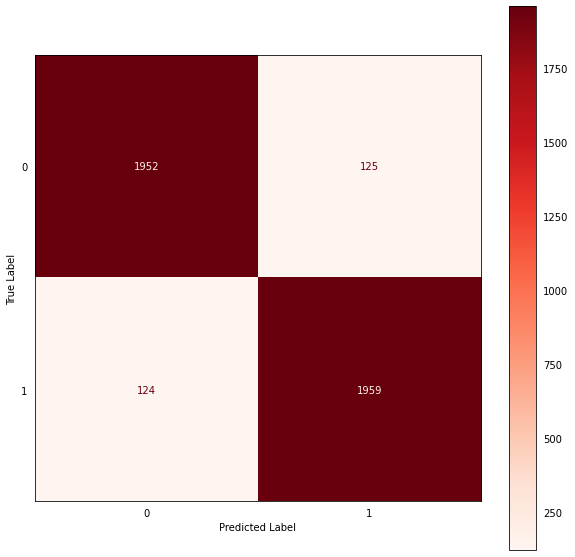

In [22]:
matrix_plot = plot_confusion_matrix(model1, X_test, Y_test, cmap=plt.cm.Reds)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

roc_auc_score for LOGISTIC REGRESSION:  0.938934553072064


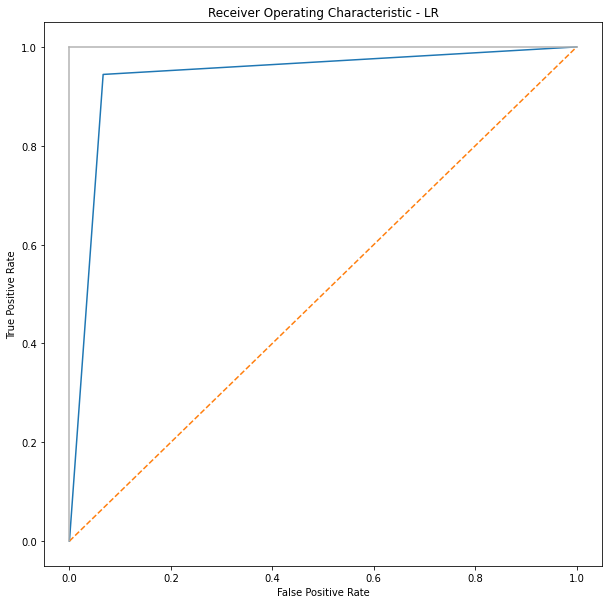

In [33]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, predict1)
print('roc_auc_score for LOGISTIC REGRESSION: ', roc_auc_score(Y_test, predict1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LR')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training the model with SVM

In [34]:
model2 = SVC()
model2.fit(X_train, Y_train)


SVC()

In [35]:
predict2 = model2.predict(X_test)


In [36]:
#Creating a confusion matrix for support vector machine
confusion_matrix(Y_test, predict2)

array([[1964,  113],
       [  95, 1988]], dtype=int64)

In [37]:
#Creating the confusion metrics
matrix = classification_report(Y_test, predict2)
print("Classification Report: \n", matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2077
           1       0.95      0.95      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


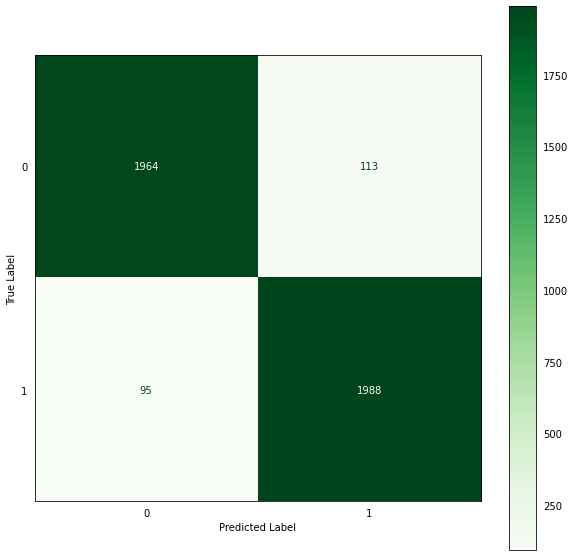

In [38]:
matrix_plot = plot_confusion_matrix(model2, X_test, Y_test, cmap=plt.cm.Greens)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

roc_auc_score for SUPPORT VECTOR MACHINE:  0.9499936552197894


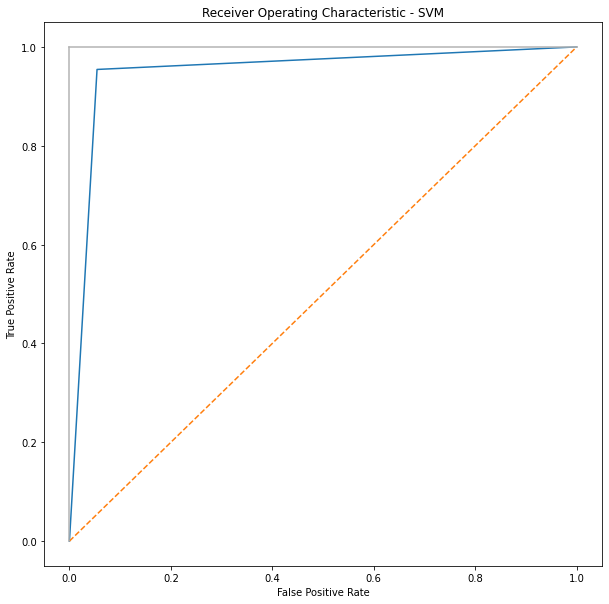

In [39]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, predict2)
print('roc_auc_score for SUPPORT VECTOR MACHINE: ', roc_auc_score(Y_test, predict2))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Training the model with Random Forest

In [40]:
model3 = RandomForestClassifier()
model3.fit(X_train, Y_train)

RandomForestClassifier()

In [41]:
predict3 = model3.predict(X_test)

In [42]:
# Creating a confusion matrix for Random Forest
confusion_matrix(Y_test, predict3)

array([[1947,  130],
       [ 283, 1800]], dtype=int64)

In [43]:
# Creating the confusion metrics
matrix = classification_report(Y_test, predict3)
print("Classification Report : \n", matrix)

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2077
           1       0.93      0.86      0.90      2083

    accuracy                           0.90      4160
   macro avg       0.90      0.90      0.90      4160
weighted avg       0.90      0.90      0.90      4160



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


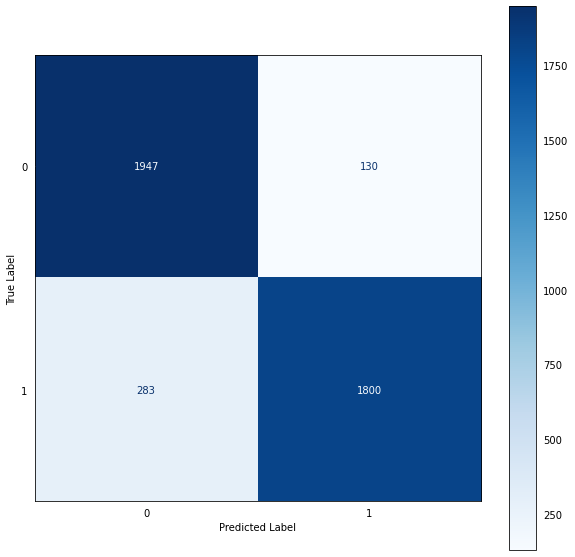

In [44]:
matrix_plot = plot_confusion_matrix(model3, X_test, Y_test, cmap=plt.cm.Blues)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

roc_auc_score for RANDOM FOREST:  0.9007739938438296


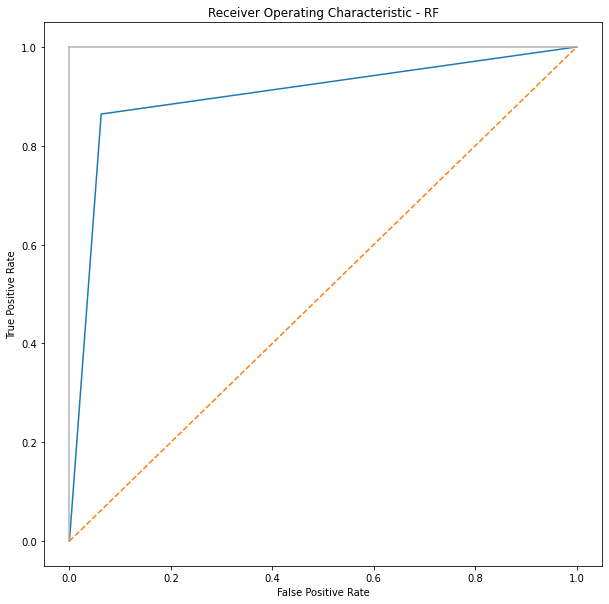

In [46]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, predict3)
print('roc_auc_score for RANDOM FOREST: ', roc_auc_score(Y_test, predict3))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RF')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [57]:
sc = StandardScaler(with_mean=False)

In [71]:
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.transform(X_test)


# TRAINING THE MODEL WITH LOGISTIC REGRESSION WITH STANSARD SCALAR


In [72]:
model1 = LogisticRegression()
model1.fit(X_train_standard, Y_train)
predict1 = model1.predict(X_test_standard)


In [73]:
#Creating the confusion metrics
matrix = classification_report(Y_test, predict1)
print("Classification Report: \n", matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2077
           1       0.94      0.92      0.93      2083

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


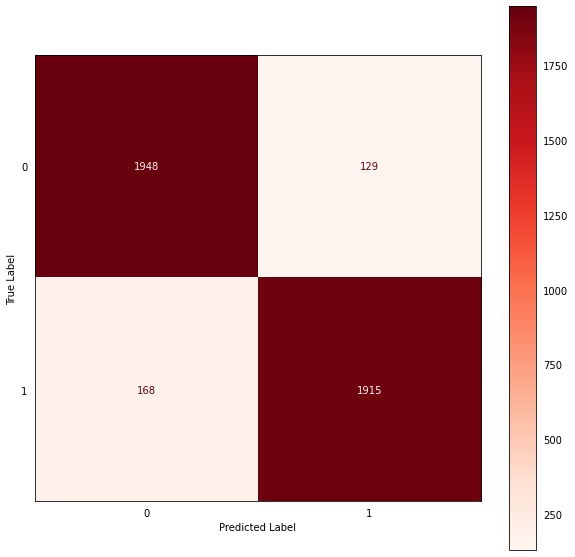

In [76]:
matrix_plot = plot_confusion_matrix(model1, X_test_standard, Y_test, cmap=plt.cm.Reds)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

roc_auc_score for LOGISTIC REGRESSION:  0.9286191423752499


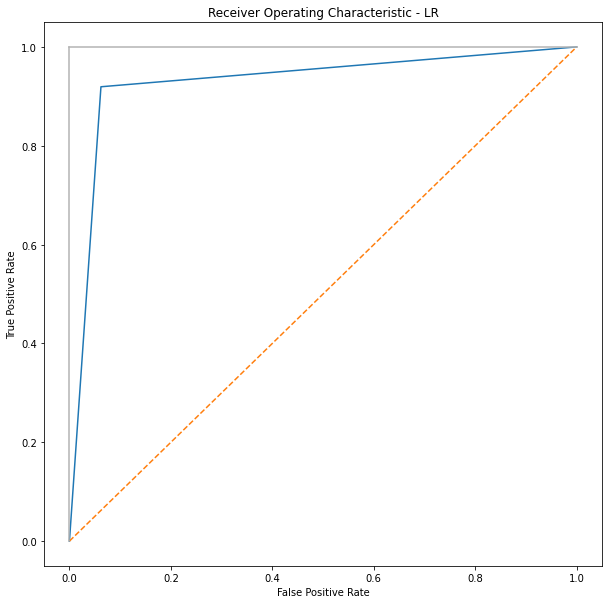

In [75]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, predict1)
print('roc_auc_score for LOGISTIC REGRESSION: ', roc_auc_score(Y_test, predict1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LR')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# TRAINING THE SVM MODEL WITH STANDARD SCALAR


In [77]:
model2 = SVC()
model2.fit(X_train_standard, Y_train)

SVC()

In [78]:
predict2 = model2.predict(X_test_standard)

In [82]:
#Creating the confusion metrics
matrix = classification_report(Y_test, predict2)
print("Classification Report: \n", matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85      2077
           1       0.95      0.69      0.80      2083

    accuracy                           0.83      4160
   macro avg       0.86      0.83      0.83      4160
weighted avg       0.86      0.83      0.83      4160



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


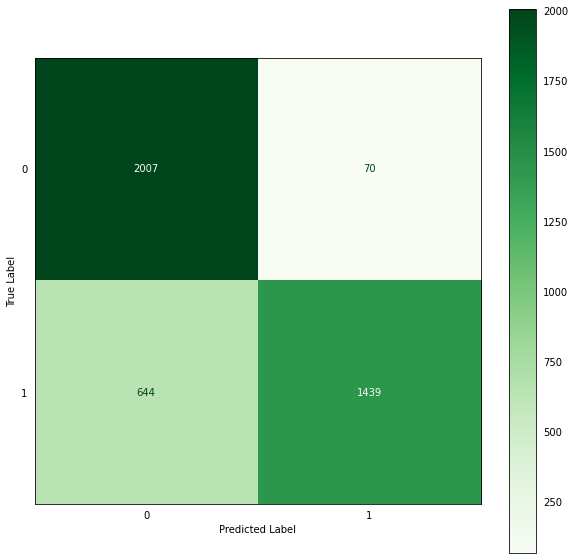

In [84]:
matrix_plot = plot_confusion_matrix(model2, X_test_standard, Y_test, cmap=plt.cm.Greens)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

roc_auc_score for SUPPORT VECTOR MACHINE:  0.8285640387103247


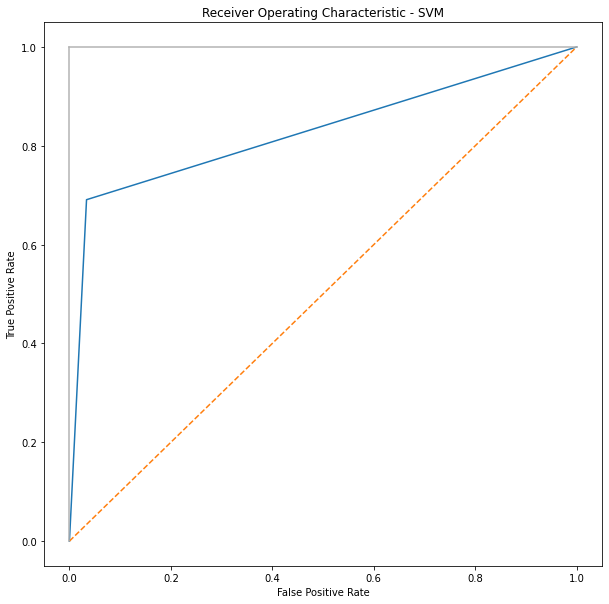

In [85]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, predict2)
print('roc_auc_score for SUPPORT VECTOR MACHINE: ', roc_auc_score(Y_test, predict2))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # TRAINING THE RANDOM FOREST MODEL WITH STANDARD SCALAR

In [87]:
model3 = RandomForestClassifier()
model3.fit(X_train, Y_train)

RandomForestClassifier()

In [88]:
predict3 = model3.predict(X_test)

In [89]:
# Creating a confusion matrix for Random Forest
confusion_matrix(Y_test, predict3)

array([[1944,  133],
       [ 256, 1827]], dtype=int64)

In [90]:
# Creating the confusion metrics
matrix = classification_report(Y_test, predict3)
print("Classification Report : \n", matrix)

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2077
           1       0.93      0.88      0.90      2083

    accuracy                           0.91      4160
   macro avg       0.91      0.91      0.91      4160
weighted avg       0.91      0.91      0.91      4160



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


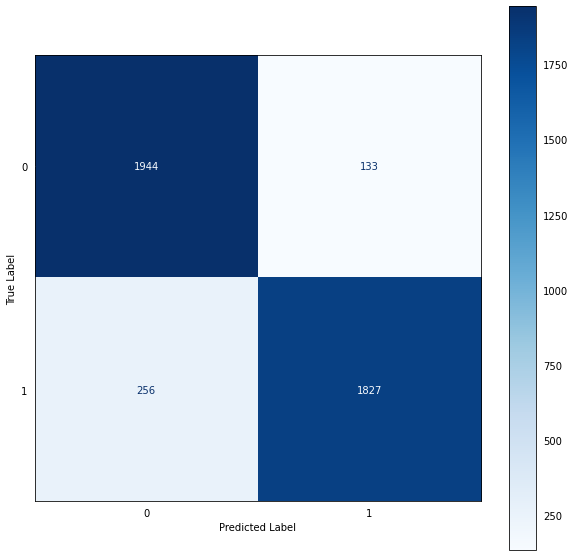

In [91]:
matrix_plot = plot_confusion_matrix(model3, X_test, Y_test, cmap=plt.cm.Blues)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

In [45]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, predict3)
print('roc_auc_score for Naive Bayes FOREST: ', roc_auc_score(Y_test, predict3))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - NF')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'predict3' is not defined

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier()

In [34]:
model4 = rf.fit(X_train, Y_train)

In [36]:
predict4 = model4.predict(X_test)

In [37]:
matrix4 = classification_report(predict4, Y_test)

In [38]:
print(matrix4)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2182
           1       0.88      0.93      0.91      1978

    accuracy                           0.91      4160
   macro avg       0.91      0.91      0.91      4160
weighted avg       0.91      0.91      0.91      4160



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


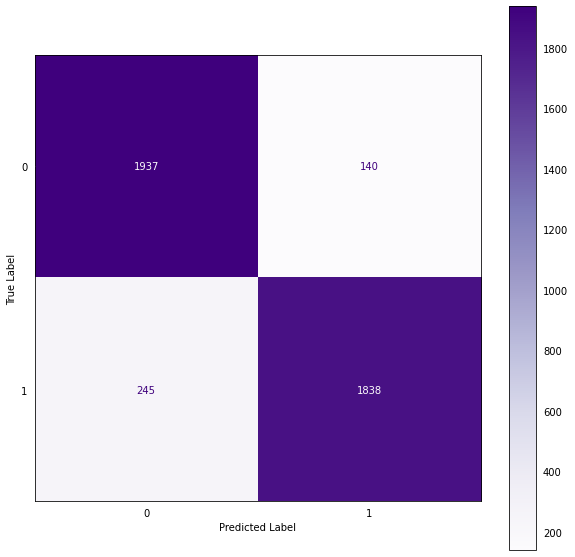

In [42]:
matrix_plot = plot_confusion_matrix(model4, X_test, Y_test, cmap=plt.cm.Purples)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()

roc_auc_score for Naive Bayes Forest:  0.9074881350298666


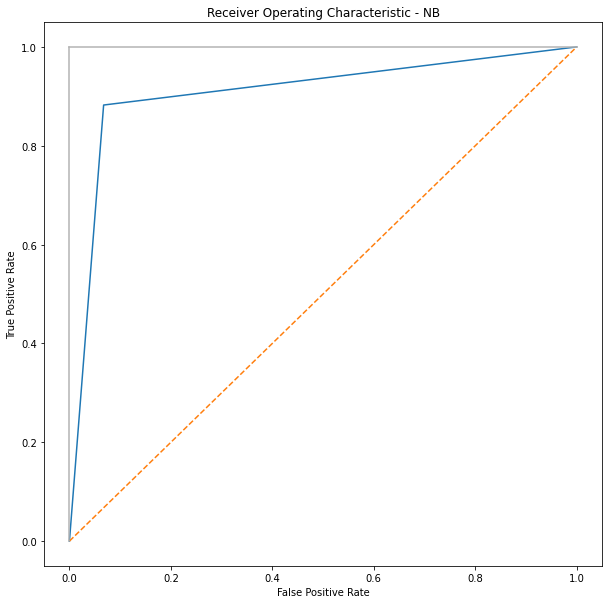

In [46]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, predict4)
print('roc_auc_score for Naive Bayes Forest: ', roc_auc_score(Y_test, predict4))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - NB')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()